In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
import pathlib as pl
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import GridSearchCV # Grid search cross validation
from sklearn.model_selection import RandomizedSearchCV # Random search cross validation
from scipy import stats
import time
import itertools
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
files.upload()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df = pd.read_excel('Des_men_modelo3.xlsx')
X_col = ['ID','DEPARTAMENTO','TIPO_PUNTO','DISCAPACIDAD','EDAD_AÑOS','GENERO','DIAGNOSTICO','PESO_KG','TALLA_CM']
df.head()




Saving Des_men_modelo3.xlsx to Des_men_modelo3 (1).xlsx


,ID,DEPARTAMENTO,TIPO_PUNTO,DISCAPACIDAD,EDAD_AÑOS,GENERO,DIAGNOSTICO,PESO_KG,TALLA_CM
0,1,2,1,0,5,0,0,13.00,100
1,2,2,1,0,6,1,2,24.55,128
2,3,2,1,0,10,1,1,24.95,131
3,4,2,1,0,5,0,0,15.20,102
4,5,2,1,0,4,1,2,12.35,95


In [3]:
df.describe()

,ID,DEPARTAMENTO,TIPO_PUNTO,DISCAPACIDAD,EDAD_AÑOS,GENERO,DIAGNOSTICO,PESO_KG,TALLA_CM
count,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000
mean,417.500000,0.792566,0.231415,0.004796,4.151079,0.407674,0.461631,13.519689,95.718225
std,240.899357,0.792457,0.421990,0.069130,2.755539,0.491697,0.564317,5.505093,20.204560
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.845000,13.000000
25%,209.250000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,9.200000,78.000000
50%,417.500000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,12.700000,95.000000
75%,625.750000,1.000000,0.000000,0.000000,6.000000,1.000000,1.000000,16.747500,110.000000
max,834.000000,2.000000,1.000000,1.000000,10.000000,1.000000,2.000000,50.150000,167.000000


Las siguientes líneas de instrucciones preparan los datos para el entrenamiento y pruebas del modelo LogisticRegression & Bosque Aleatorio, dividiendo las variables independientes (X) y la variable dependiente (y).


print(df.groupby('DIAGNOSTICO').size()):

df.groupby('DIAGNOSTICO'): Agrupa el DataFrame df por la columna 'DIAGNOSTICO'.
el parámetro .size(): Calcula el tamaño de cada grupo, es decir, cuenta cuántas registros hay para cada valor único en la columna 'DIAGNOSTICO'.
print(...): Muestra los resultados por consola.

En resumen, esta línea imprime el tamaño de cada grupo de diagnóstico en el DataFrame.

df.drop(['DIAGNOSTICO'],1).hist():

df.drop(['DIAGNOSTICO'], 1): Elimina la columna 'DIAGNOSTICO' del DataFrame. El argumento 1 indica que se está eliminando una columna.
.hist(): Crea un histograma para visualizar la distribución de las variables restantes en el DataFrame.

Esta línea genera histogramas para las variables del DataFrame después de excluir la columna 'DIAGNOSTICO'.

plt.show():

plt.show(): Muestra las visualizaciones creadas con matplotlib.

sb.pairplot(df.dropna(), hue='DIAGNOSTICO', size=5, vars=["DEPARTAMENTO", "TIPO_PUNTO", "DISCAPACIDAD", "EDAD_AÑOS", "GENERO", "PESO_KG", "TALLA_CM"], kind='reg'):

sb.pairplot(...): Crea un gráfico de pares utilizando seaborn para visualizar las relaciones entre las variables seleccionadas. Los parámetros son los siguientes:

df.dropna(): Elimina las filas que contienen valores nulos.

hue='DIAGNOSTICO': Colorea los puntos según la columna 'DIAGNOSTICO'.

size=5: Especifica el tamaño del gráfico.

vars=["DEPARTAMENTO", "TIPO_PUNTO", "DISCAPACIDAD", "EDAD_AÑOS", "GENERO", "PESO_KG", "TALLA_CM"]: Selecciona las variables a incluir en el gráfico.

kind='reg': Incluye líneas de regresión en los gráficos de dispersión.
Esta línea genera un gráfico de pares con líneas de regresión para explorar las relaciones entre las variables seleccionadas.

X = np.array(df.drop(['DIAGNOSTICO'],1)):

X: Crea una matriz X que contiene las variables independientes para el modelo.
np.array(...): Convierte el DataFrame resultante después de eliminar la columna 'DIAGNOSTICO' en un array de NumPy.
y = np.array(df['DIAGNOSTICO']):

y: Crea un array y que contiene la variable dependiente para el modelo.
np.array(df['DIAGNOSTICO']): Convierte la columna 'DIAGNOSTICO' en un array de NumPy.
X.shape:

X.shape: Muestra las dimensiones de la matriz X, es decir, el número de filas y columnas.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42):

train_test_split(...): Divide los datos en conjuntos de entrenamiento y prueba.
test_size=0.2: Indica que el 20% de los datos se utilizarán como conjunto de prueba.
random_state=42: Establece una semilla para la reproducibilidad de la división.


DIAGNOSTICO
0    478
1    327
2     29
dtype: int64


<ipython-input-4-263783fb8135>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['DIAGNOSTICO'],1).hist()


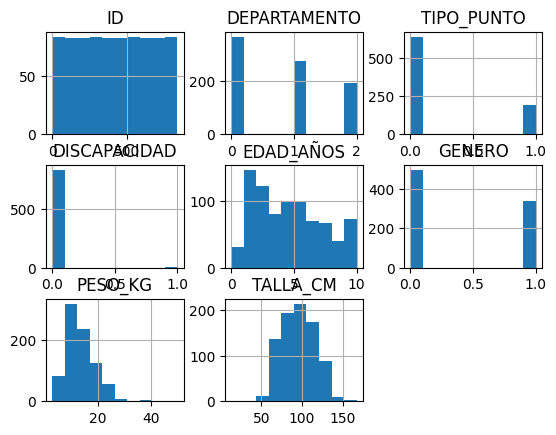

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
<ipython-input-4-263783fb8135>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['DIAGNOSTICO'],1))


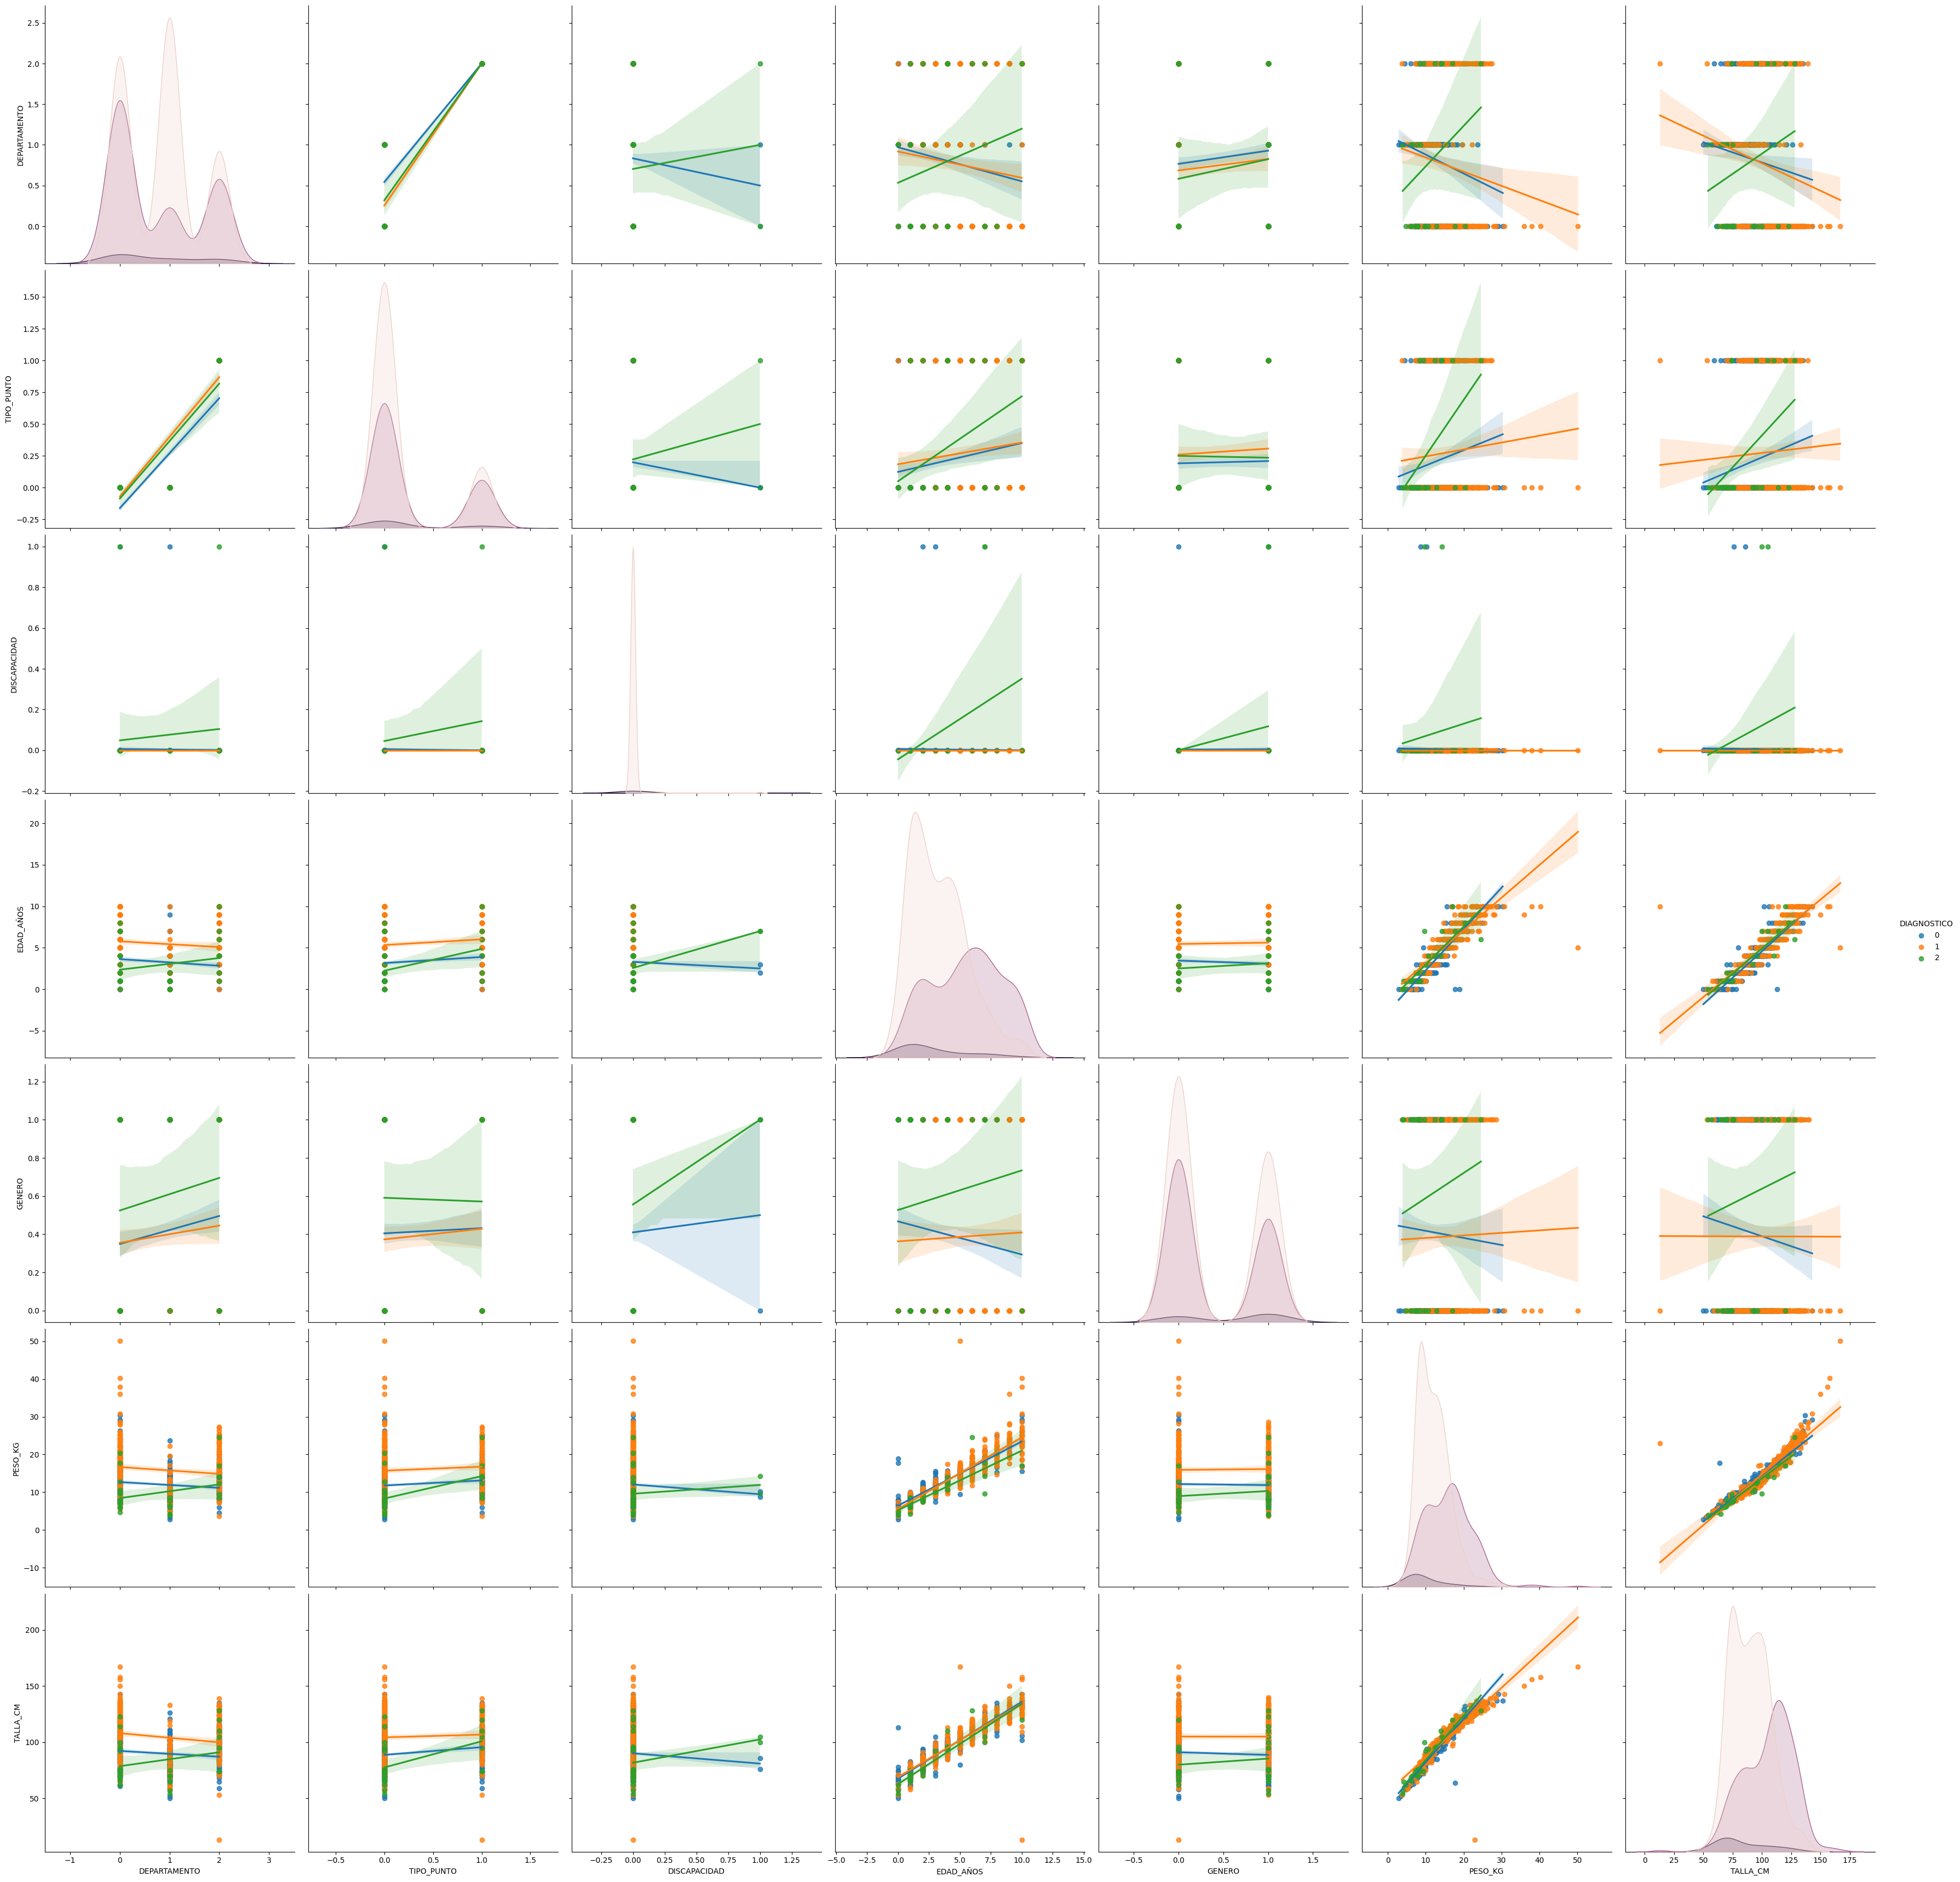

In [4]:
print(df.groupby('DIAGNOSTICO').size())


df.drop(['DIAGNOSTICO'],1).hist()
plt.show()
sb.pairplot(df.dropna(), hue='DIAGNOSTICO',size=5,vars=["DEPARTAMENTO","TIPO_PUNTO","DISCAPACIDAD","EDAD_AÑOS","GENERO","PESO_KG","TALLA_CM"],kind='reg')

X = np.array(df.drop(['DIAGNOSTICO'],1))
y = np.array(df['DIAGNOSTICO'])
X.shape


x_train, x_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)





Split del dataset Para efectos del entrenamiento del modelo, fijamos el 80% de los datos totales para el entrenamiento y 20% para la prueba:

In [5]:
df2 = df.copy()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop('DIAGNOSTICO', axis=1), df2['DIAGNOSTICO'], test_size=0.2, random_state=42)
print(f"Tamaño del conjunto de entrenamiento: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Tamaño del conjunto de prueba: X_test: {X_test.shape}, y_test: {y_test.shape}")

Tamaño del conjunto de entrenamiento: X_train: (667, 8), y_train: (667,)
Tamaño del conjunto de prueba: X_test: (167, 8), y_test: (167,)


Modelos

A continuación se definen los parámetros a evaluar en las hipótesis planteadas inicialmente. Los modelos a evaluar para el dataset preparado y transformado son los siguientes:

Regresión logística

Bosque Aleatorio

PCA

In [7]:
param_grid_mod1 = {
    'penalty': ['l1','l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear']
}

param_grid_mod2 = {
    'n_estimators': [50, 100, 250],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

De acuerdo con lo anterior que se han definido los siguientes hiperparámetros para la regresión logística:

Regularización('penalty), con el objeto de evitar sobreajuste, con los métodos l1 para Lasso y l2 para Ridge.

Fuerza de la regulazización, "C". Constante con tres valores: 0.1, 1 y 10.

Solver: Acá sólo utilizamos el algoritmo "liblineal" para ajustar los pesos de la regresión.

En total, tendríamos un total de 6 combinaciones de hiperparámetros para la evaluación de este modelo.

Por otro lado, para el caso de los Random Forest a evaluar, vamos a definir los siguientes hiperparámetros:

Número de árboles ('n_estimators): El número de árboles que tendrá el bosque. Evaluaremos con 50, 100 y 250 árboles, adecuado para el tamaño del dataset a estudiar.

Profundidad máxima ('max_depth'): Define cuán profundo pueden crecer los ábholes. Para el tamaño de la muestra consideramos adecuado simular con los valores 10, 20 y 30.

Mínimo de muestras para definir un nodo ('min_samples_split'): Usamos los valores de 2, 5 y 10, adecuados para el tamaño del dataset y para prevenir sobreajuste.

Mínimo número de muestras en hojas terminales ('min_samples_leaf'): Usamos los valores 1, 2 y 4, adecuado para el tamaño del dataset.

Esto significa que tenemos un total de 81 posibles combinaciones de todos los parámetros definidos (3 cantidades de árboles, 3 parámetros de profundidad máxima, 3 del mínimo de muestras por nodo y 3 de mínimo de muestras en hojas terminales. (3^4 parámetros).

In [8]:
models = {
    'LogisticRegression': (LogisticRegression(random_state=42,max_iter=500), param_grid_mod1),
    'RandomForestClassifier': (RandomForestClassifier(random_state=42), param_grid_mod2),
}

In [21]:
# DataFrame para almacenar los resultados
columns = ['Modelo', 'Número de iteraciones', 'Mejor accuracy', 'Tiempo empleado']
results_grid = pd.DataFrame(columns=columns)

# Realizando la búsqueda en cuadrícula para cada modelo
for model_name, (model, param_grid) in tqdm(models.items()):
    gs = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    scoring='accuracy',
                    cv=10,
                    n_jobs=-1,
                    verbose=2)
    print(f"Realizando Grid Search para el modelo {model_name}...")
    # Medir el tiempo de ejecución
    time_start = time.time()
    gs.fit(X_train, y_train)
    time_grid = time.time() - time_start

    values_grid  = [model_name, len(gs.cv_results_['params']), gs.best_score_, time_grid]
    result_df    = pd.DataFrame([values_grid], columns=columns)
    results_grid = pd.concat([results_grid, result_df], ignore_index=True)
    print('El resultado del modelo es: ', gs.best_score_)

# Visualizar los resultados
print("Resultados de Grid Search:")
print(results_grid)

  0%|          | 0/2 [00:00<?, ?it/s]

Realizando Grid Search para el modelo LogisticRegression...
Fitting 10 folds for each of 6 candidates, totalling 60 fits


 50%|█████     | 1/2 [00:01<00:01,  1.75s/it]

El resultado del modelo es:  0.6850972410673902
Realizando Grid Search para el modelo RandomForestClassifier...
Fitting 10 folds for each of 81 candidates, totalling 810 fits


100%|██████████| 2/2 [03:44<00:00, 112.12s/it]

El resultado del modelo es:  0.716508367254636
Resultados de Grid Search:
                   Modelo Número de iteraciones  Mejor accuracy  \
0      LogisticRegression                     6        0.685097   
1  RandomForestClassifier                    81        0.716508   

   Tiempo empleado  
0         1.749845  
1       222.475493  


Las siguientes líneas de código están relacionadas con la estandarización de las variables en el DataFrame utilizando StandardScaler de scikit-learn.

La estandarización implica restar la media y dividir por la desviación estándar, de manera que las variables resultantes tengan una media de 0 y una desviación estándar de 1.
En resumen, esta línea estandariza las variables seleccionadas en el DataFrame utilizando StandardScaler y actualiza esas columnas con los valores estandarizados.

Aquí está la explicación:

scaler = StandardScaler(): Se crea una instancia del objeto StandardScaler. Este objeto se utilizará para estandarizar las variables.

df[X_col] = scaler.fit_transform(df[X_col]):

df[X_col]: Selecciona las columnas especificadas por X_col del DataFrame df.
scaler.fit_transform(...): Ajusta el scaler a los datos y transforma las columnas seleccionadas.

df.head(): Muestra las primeras filas del DataFrame después de la transformación para verificar cómo se ven los datos estandarizados.

En términos generales, la estandarización es útil para asegurarse de que las variables tengan escalas comparables, lo que puede ser importante para algunos algoritmos de aprendizaje automático.

In [40]:
scaler = StandardScaler()
df[X_col] = scaler.fit_transform(df[X_col])
df.head()

,ID,DEPARTAMENTO,TIPO_PUNTO,DISCAPACIDAD,EDAD_AÑOS,GENERO,DIAGNOSTICO,PESO_KG,TALLA_CM
0,-1.729975,1.524573,1.822428,-0.069421,0.308263,-0.829614,-0.818525,-0.094458,0.212048
1,-1.725822,1.524573,1.822428,-0.069421,0.671386,1.205380,2.727707,2.004858,1.598706
2,-1.721668,1.524573,1.822428,-0.069421,2.123879,1.205380,0.954591,2.077562,1.747276
3,-1.717514,1.524573,1.822428,-0.069421,0.308263,-0.829614,-0.818525,0.305412,0.311095
4,-1.713361,1.524573,1.822428,-0.069421,-0.054860,1.205380,2.727707,-0.212602,-0.035569


Modelo PCA

Las siguientes líneas de código están utilizando Análisis de Componentes Principales (PCA) para reducir la dimensionalidad de los datos a solo dos componentes principales.

pca2 = PCA(n_components=2, random_state=42): Se crea una instancia de la clase PCA (Análisis de Componentes Principales) con el argumento n_components=2, lo que indica que se desean dos componentes principales. El parámetro random_state=42 se utiliza para la reproducibilidad del resultado.

pca_2 = pca2.fit_transform(df[X_col]):

pca2.fit_transform(...): Ajusta el modelo PCA a los datos y transforma las variables originales a las dos componentes principales.
df[X_col]: Selecciona las columnas especificadas por X_col del DataFrame df para realizar el análisis de componentes principales.
Después de esta línea, pca_2 contendrá los valores transformados, donde cada fila representará una observación y las dos columnas serán los dos componentes principales.

pca_2[:4]: Muestra las primeras cuatro filas de la matriz transformada pca_2, proporcionando una vista previa de cómo se ven los datos después de la reducción de dimensionalidad.

En resumen, estas líneas realizan una reducción de dimensionalidad utilizando PCA, manteniendo solo dos componentes principales, y luego imprimen las primeras cuatro filas de los datos transformados. Este tipo de reducción de dimensionalidad es útil para visualización y, en algunos casos, para mejorar el rendimiento de los modelos al reducir la complejidad de los datos.

In [41]:
pca2 = PCA(n_components=2,random_state=42)
pca_2 = pca2.fit_transform(df[X_col])
pca_2[:4]

array([[1.168557  , 2.59834607],
       [3.79946358, 1.8086405 ],
       [4.28822996, 1.60732309],
       [1.41697836, 2.49891397]])

Seguidamente creamos DataFrame (df_2) que combina la información de las dos componentes principales obtenidas mediante PCA con la información de diagnóstico del DataFrame original. Esto es útil para visualizar y analizar la relación entre las componentes principales y el diagnóstico en un conjunto de datos reducido en dimensionalidad.

In [42]:
df_2 = pd.DataFrame({'PCA1':pca_2[:,0],'PCA2':pca_2[:,1],'DIAGNOSTICO':df['DIAGNOSTICO']})
df_2.head()

,PCA1,PCA2,DIAGNOSTICO
0,1.168557,2.598346,-0.818525
1,3.799464,1.808640,2.727707
2,4.288230,1.607323,0.954591
3,1.416978,2.498914,-0.818525
4,1.466428,2.663848,2.727707


La propiedad explained_variance_ratio_ de un objeto PCA en scikit-learn que devuelve la proporción de varianza explicada por cada una de las componentes principales. En tu caso pca2, que es una instancia de la clase PCA con dos componentes principales.

Esto imprimirá un array que contiene dos valores, cada uno representando la proporción de varianza explicada por la respectiva componente principal. Estos valores tiende a sumar 1.0, ya que están expresados como porcentajes de la varianza total.

In [43]:
pca2.explained_variance_ratio_

array([0.36186957, 0.23710538])

La expresión pca2.explained_variance_ratio_.sum() calcula la suma acumulativa de las proporciones de varianza explicada por cada componente principal en el objeto PCA (pca2). Este valor debería ser igual a 1.0, ya que representa la totalidad de la varianza en los datos originales.

En este caso el resultado es 59% que expresa cuánta varianza se mantiene al considerar las primeras componentes principales, ya que se está utilizando n_components=2) explica casi toda la variabilidad de los datos originales. Esto es útil para determinar cuánta información se puede retener al reducir la dimensionalidad de los datos.

In [44]:
pca2.explained_variance_ratio_.sum()

0.5989749507945039

Este gráfico de barras es útil para visualizar de manera intuitiva cuánta varianza está explicada por cada una de las dos primeras componentes principales. La altura de las barras indica la proporción de varianza explicada por cada componente.

sns.barplot(x=['PCA1', 'PCA2'], y=pca2.explained_variance_ratio_): Crea un gráfico de barras donde el eje 'x' representa las dos primeras componentes principales ('PCA1' y 'PCA2') y el eje 'y' representa las proporciones de varianza explicada por cada componente principal.



<Axes: >

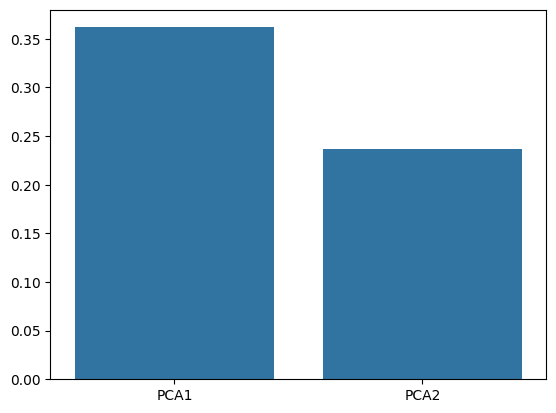

In [45]:
sns.barplot(x=['PCA1','PCA2'],y=pca2.explained_variance_ratio_)

Este gráfico de dispersión proporciona una representación visual de cómo se distribuyen los datos en el espacio de las dos primeras componentes principales, y cómo esta distribución se relaciona con la variable 'DIAGNOSTICO'.
Los diferentes colores indican diferentes diagnósticos en la gráfica va del color mas claro hace referencia a Diagnóstico por desnutrición leve, el color intermedio Diagnóstico por desnutrición Moderada, por último el color más oscuro indica Diagnóstico por desnutrición Severa.
El gráfico facilita la identificación de patrones o agrupamientos en los datos.

<Axes: xlabel='PCA1', ylabel='PCA2'>

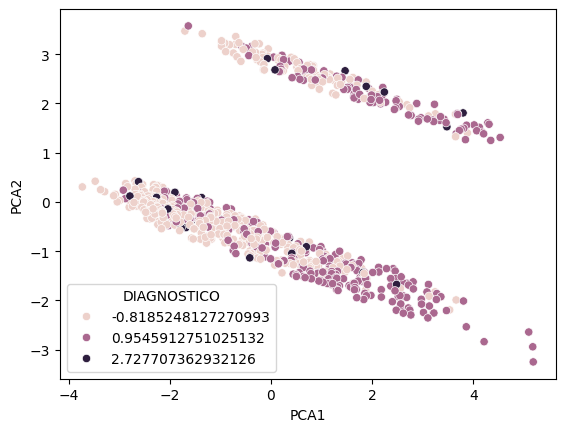

In [46]:
sns.scatterplot(x='PCA1',y='PCA2',hue='DIAGNOSTICO',data=df_2)

En las siguientes líneas se crea una nueva instancia de la clase PCA con n_components=3, lo que indica que se desea obtener tres componentes principales.

Esto imprimirá un array que contiene tres valores, cada uno representando la proporción de varianza explicada por la respectiva componente principal. Estos valores tiende a sumar 1.0, ya que están expresados como porcentajes de la varianza total.

In [47]:
pca3 = PCA(n_components=3,random_state=42)
pca_3 = pca3.fit_transform(df[X_col])
pca_3[:4]

array([[ 1.168557  ,  2.59834607, -1.00529533],
       [ 3.79946358,  1.8086405 ,  1.40446243],
       [ 4.28822996,  1.60732309,  0.74054166],
       [ 1.41697836,  2.49891397, -1.0235508 ]])

In [48]:
df_3 = pd.DataFrame({'PCA1':pca_2[:,0],'PCA2':pca_2[:,1],'PCA3':pca_3[:,2]})
df_3.head()

,PCA1,PCA2,PCA3
0,1.168557,2.598346,-1.005295
1,3.799464,1.808640,1.404462
2,4.288230,1.607323,0.740542
3,1.416978,2.498914,-1.023551
4,1.466428,2.663848,1.544155


In [49]:
pca3.explained_variance_ratio_

array([0.36186957, 0.23710538, 0.11967223])

La expresión pca3.explained_variance_ratio_.sum() calcula la suma acumulativa de las proporciones de varianza explicada por cada componente principal en el objeto PCA (pca3). Este valor debería ser igual a 1.0, ya que representa la totalidad de la varianza en los datos originales.

En este caso el resultado es 71% que expresa cuánta varianza se mantiene al considerar las primeras componentes principales, ya que se está utilizando n_components=3) explica casi toda la variabilidad de los datos originales. Esto es útil para determinar cuánta información se puede retener al reducir la dimensionalidad de los datos.

In [50]:
pca3.explained_variance_ratio_.sum()

0.7186471776965645

Este gráfico de barras es útil para visualizar de manera intuitiva cuánta varianza está explicada por cada una de las dos primeras componentes principales. La altura de las barras indica la proporción de varianza explicada por cada componente.

sns.barplot(x=['PCA1', 'PCA2','PCA3'], y=pca3.explained_variance_ratio_): Crea un gráfico de barras donde el eje 'x' representa las dos primeras componentes principales ('PCA1', 'PCA2' y 'PCA3') y el eje 'y' representa las proporciones de varianza explicada por cada componente principal.

<Axes: >

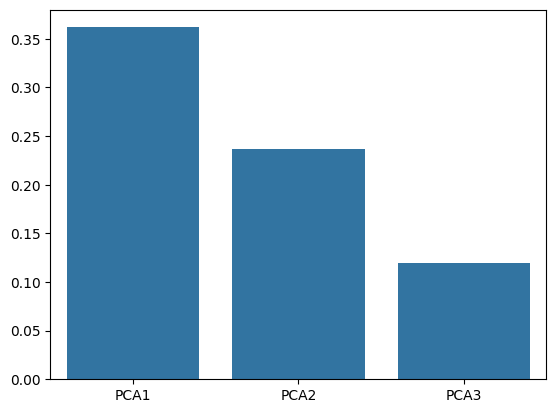

In [51]:
sns.barplot(x=['PCA1','PCA2','PCA3'],y=pca3.explained_variance_ratio_)

En el siguiente cuadro comparativo podemos apreciar que el modelo PCA3 nos da la mejor precisión;

        Modelo  Mejor accuracy  \
LogisticRegression  0.685097   
RandomForestClassifier  0.716508   
PCA(n_components=3)     0.718647